In [1]:
import neural_net
import pandas as pd 
import pickle 
import numpy as np
import scipy.optimize as op
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
from numpy import genfromtxt
train = genfromtxt('../../mnist_train.csv', delimiter=',')
#train = pd.read_csv('../../mnist_train.csv')

MemoryError: 

In [7]:
import numpy as np 
import copy 

def sigmoid(values):
    return 1 / (1 + np.exp(-values))

def forward_setup(nodos,X,Y,hidden_layers):
    nodos.insert(0,X.shape[1])
    nodos.append(len(Y[0]))
    nodes = [i + 1 for i in nodos]

    # red, mesh de thetas 
    thetas = []
    # por el momento le voy a poner mas 1 por la output layer 
    for i in range(hidden_layers + 1):
        temp_primero = np.expand_dims(np.asarray([(np.random.randint(1,50) / 2000) for i in range(nodes[i])],dtype='float64'),1)
        thetas.append(np.matrix(np.asarray(
            [temp_primero for i in range(nodos[i + 1])]
            )))
    return thetas

def forward_prop(X,thetas):
    inicial = X.T      
    trace = [inicial]
    for i in range(len(thetas)):
        interno = np.matmul(
            thetas[i],
            np.vstack(
                [np.expand_dims(np.ones(trace[i].shape[1]),0),
                trace[i]]
                )
        )
        trace.append(sigmoid(interno))
    return trace 

def backward_prop(thetas,shapes,X,Y):
    m,_ = X.shape
    # regresar a su normalidad 
    thetas = unflatten_zetas(thetas,shapes)
    delta = copy.deepcopy(thetas)
    for i in delta: i[:] = 0
    activation_trace = forward_prop(X,thetas)
    first_delta = activation_trace[-1] - Y.T
    deltas = [first_delta]
    # backward prop 
    for i in reversed(range(1,len(thetas))):
        first_delta = np.multiply(
            np.matmul(thetas[i].T[1:,:],first_delta),
            np.multiply(activation_trace[i],(1-activation_trace[i]))
            )
        deltas.append(first_delta)
    deltas.append(None)

    deltas = list(reversed(deltas))
    for i in range(len(delta)):
        temp_shape = activation_trace[i].shape
        multi_res = np.matmul(
            deltas[i + 1],
            np.vstack([np.ones((1,temp_shape[1])),activation_trace[i]]).T
            )
        delta[i] += multi_res / m
    return flatten_zetas(delta)[0]
    
def flatten_zetas(thetas):
    flat_zetas = np.asarray([])
    shapes = []
    for i in thetas:
        shapes.append(i.shape)
        flat_zetas = np.concatenate((flat_zetas,np.ravel(i)))
    return (flat_zetas,shapes)

def unflatten_zetas(flat_thetas,shapes):
    res = []
    for i in shapes:
        cantidad = i[0] * i[1]  
        res.append(flat_thetas[:cantidad].reshape(i))
    return res 

def cost(thetas,shapes,X,Y):
    thetas = unflatten_zetas(thetas,shapes)
    h = forward_prop(X,thetas)[-1]
    calculate = (Y * np.log(h).T) + ((1 - Y) * np.log(1 - h).T)
    print(np.sum(calculate) / (- X.shape[0]))
    return np.sum(calculate) / (- X.shape[0])

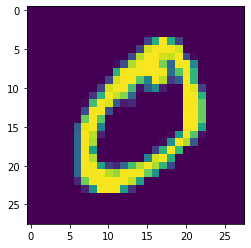

In [8]:
from sklearn import preprocessing

y_inicial = np.expand_dims(train[:,0],1)
x_inicial = train[:,1:] / 1000
#x_inicial = preprocessing.normalize(train[:,1:])
test = plt.imshow(train[:,1:][1].reshape(28,28))
plt.show()
cat = 10
introduce_y = (y_inicial == np.arange(cat)).astype(int)

In [9]:
nodes_inicio = [2000]
thetas = forward_setup(nodes_inicio, x_inicial,introduce_y,len(nodes_inicio))
ingreso = flatten_zetas(thetas)

In [ ]:
comienzo = time.time()

resultado = op.minimize(
    fun=cost,
    x0=ingreso[0],
    args=(ingreso[1],x_inicial,introduce_y),
    method='L-BFGS-B',
    jac=backward_prop,
    options={
        'disp':True,
        'maxiter':1300
    }
)

final = time.time()

128.78286545655237
128.58857764454257
127.81254758736206
124.72647171011386
112.67740808399232
69.5613744953824
52.84123419774499
58.53412691904602
67.21440245261815
69.06952939577552
69.45773138399807
69.53949929505107
69.5567558097988
69.56039924140143
69.56116856328617
69.56133101114855
69.56136531332687
69.56137255651515
69.56137408597449
69.5613744089325
69.56137447712776
69.56137449152779
69.56137449456844
69.56137449521052
69.5613744953461
69.56137449537474
61.79085924550473
34.26197810609185


c:\users\joseg\onedrive - universidad francisco marroquin\cs7\env\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in log
c:\users\joseg\onedrive - universidad francisco marroquin\cs7\env\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in multiply


nan
nan
nan


c:\users\joseg\onedrive - universidad francisco marroquin\cs7\env\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


nan


In [ ]:
print("executed in: ",(final - comienzo))

In [115]:
hola = resultado.x
resultado

      fun: 2.7702721232955465
 hess_inv: <636010x636010 LbfgsInvHessProduct with dtype=float64>
      jac: array([-8.27560131e-05,  0.00000000e+00,  0.00000000e+00, ...,
       -1.06517422e-03, -4.22403240e-03, -5.60569439e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 47
      nit: 11
   status: 0
  success: True
        x: array([ -1.58431913,   0.035     ,   0.028     , ...,  -9.38678139,
       -11.99472449,  -7.81884405])

In [119]:
# test 
model_thetas = unflatten_zetas(hola,ingreso[1])

In [120]:
y_test = np.expand_dims(train[:,0],1)
x_test = train[:,1:] / 1000

In [121]:
respuestas = forward_prop(x_test,model_thetas)

4


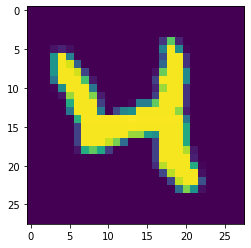

[0.02511535 0.03890323 0.25895956 0.0044337  0.61475877 0.00302271
 0.51800015 0.00921657 0.04009997 0.0571762 ]


In [145]:
number = 20
prueba = respuestas[-1][:][:,number]
print(np.argmax(prueba))
test = plt.imshow(train[:,1:][number].reshape(28,28))
plt.show()